## Hedging and Monte Carlo Greeks
1. Hedging with the Black & Scholes model
2. Dynamic Hedging- Python Experiment
3. Jumps and Hedging
4. Delta, Gamma and Vega Hedging
5. Finite Difference
6. Pathwise Sensitivies
7. Likelihood ratio methods


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import enum 
from mpl_toolkits import mplot3d
from scipy.interpolate import RegularGridInterpolator

## Delta Hedging under the Black-Scholes Model
Consider the following Portfolio:
$$\Pi (t,S) = V(t,s) - \Delta S $$


The objective of the Delta hedging is that the value of the portfolio does not change when the underlying asset moves, so the derivative of the portfolio $\Pi$ needs to be equal to 0 i.e,

$$\frac{\partial \Pi(t,S)}{\partial S} = \frac{\partial V(t,S)}{\partial S} - \Delta = 0 $$

Suppose we sold a call $V_c(t_0,S)$ at time t_0, with maturity T and strike K. By selling, we obtained a cash amount equal to $V_c(t_0,S)$ and we perform a dynamic hedging strategy until time $T$. Initially at the inception we have:
$$ \Pi (t_0,S) \coloneqq V_c(t_0,S) - \Delta(t_0)S_0$$

Every day we may need to re-balance the position and hedge the portfolio. At some time $t_1>t_0$ we then receive or pay interest over the time period $[t_0,t_1]$, which will amount $PL_{t_0}e^{r(t_1 - t_0)}$ (profit and loss)

At time $t_1$ we have $\Delta(t_0) S(t_1)$ which may be sold and we will update the hedge portfolio. Particularly we purchase $ \Delta(t_1) stocks$ costing $- \Delta(t_1) S(t_1). The overall $PL(t_1)$ account will become:
$$PL_{t_1} = PL_{t_0}e^{r(t_1 - t_0)} - (\Delta(t_1) - \Delta(t_0))S(t_1)$$

Assuming a time grid with $ T= i \frac{T}{m}, the following recursive formula for the m time steps is obtained,
$$ \begin{cases}
PL(t_0)= V_c(t_0,S) - \Delta(t_0)S(t_0), \\
PL(t_i) = PL(t_{i-1})e^{r(t_i - t_{i-1})} - (\Delta_{t_i} - \Delta_{t_{i-1}}) S(t_i) \end{cases} $$
for $i=1, ..., m-1$

At the option maturity, the option holder may exercise the option or let the option expire worhtless, on the other hand at maturity we own \Delta(t_m) that may be sold in the market. The value of the portfolio at time $t_m=T$ is then given by:

$$PL(t_i) = PL(t_{m-1})e^{r(t_m - t_{m-1})} - max(S(t_m)-K,0) + \Delta (t_{m-1})S(t_m)$$

If the cost of hedging is equal to the value of the derivative, then the $PL(T)$ would be equal to 0 on average. 
$$ \mathbb{E}[PL(T)]=0$$

$$ \begin{cases}
PL_{t_0} = V_c(t_0,S) - \Delta(t_0)S(t_0) \\
PL_{t_1} = PL_{t_0}e^{r(t_1 - t_0)} - (\Delta(t_1) - \Delta(t_0)) S(t_1) \\
PL_{t_1} = PL_{t_1}e^{r(t_2 - t_1)} - max(S(t_2),K) + \Delta(t_1)  S(t_2) \end{cases}$$


$$ PL(T_2) = \bigg[ V_c(t_0,S) - \Delta(t_0)S(t_0) e^{r(t_2 - t_0)} -  (\Delta(t_1) - \Delta(t_0)) S(t_1) - max(S(t_2),K) + \Delta(t_2)  S(t_1)\bigg] $$


By the definition of a call option we also have:
$$ \mathbb{E}[max(S(T)- K,0)|\mathcal{F}_{t_0}] = e^{r(t_2 - t_0)}V_c(t_0,S)$$
and because the discounted stock price, under the risk neutral measure is a martingale,
$$ \mathbb{E}[S(T)|\mathcal{F}_{t}] = e^{r(T-t)}S(t)$$
the expectation of the $PL(T)$ is given by;

$$ \mathbb{E}[PL(T_2)|\mathcal{F}_0] = \bigg[ (V_c(t_0,S) - \Delta(t_0)S(t_0)) e^{r(t_2 - t_0)}  - \mathbb{E}[max(S(t_2),K)|\mathcal{F_{t_0}}] - (\Delta(t_1) - \Delta(t_0))  \mathbb{E}[S(t_1)|\mathcal{F_{t_0}}] e^{r(t_2 - t_1)} +\Delta(t_1)\mathbb{E}[S(t_2)|\mathcal{F_{t_0}}]  \bigg] $$


Using the relation:
$$  \mathbb{E}[S(t_1)|\mathcal{F_{t_0}}]e^{r(t_2-t_1)} = \mathbb{E}[S(t_2)|\mathcal{F_{t_0}}] $$
the expression simplifies to:
$$ \mathbb{E}[PL(T_2)|\mathcal{F}_0]= - \Delta(t_1) S(t_0)e^{r(t_2 - t_0)} + \Delta(t_1)  \mathbb{E}[S(t_2)|\mathcal{F_{t_0}}]=0$$


The distribution of the $PL$ strongly depend on the $\Delta$. The variance of the $PL$ decrease with the frequency of the $\Delta$ hedging.

## Dynamic Hedging with the Black-Scholes: Experiment
In this experiment we perform a dynamic hedge for a call option under the Black-Scholes model. 
For the asset price the following model parameters are set:
- $S_0 =1$
- $ r=0.01$
- $\sigma=0.2$
- $T=1$
- $K=0.95$

/var/folders/zv/yh2kwtrj003cc_tbwt7gr8r40000gn/T/ipykernel_3009/3537825264.py:48: RuntimeWarning: divide by zero encountered in divide
  d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) * \
/var/folders/zv/yh2kwtrj003cc_tbwt7gr8r40000gn/T/ipykernel_3009/3537825264.py:34: RuntimeWarning: invalid value encountered in sqrt
  * (T-t)) / (sigma * np.sqrt(T-t))
/var/folders/zv/yh2kwtrj003cc_tbwt7gr8r40000gn/T/ipykernel_3009/3537825264.py:35: RuntimeWarning: invalid value encountered in sqrt
  d2    = d1 - sigma * np.sqrt(T-t)


path_id =  0, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.9468,S(t_m) = 1.3805, max(S(tm)-K,0)= 0.4305, PnL(t_m) = 0.0028
path_id =  1, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.9516,S(t_m) = 1.1904, max(S(tm)-K,0)= 0.2404, PnL(t_m) = -0.0020
path_id =  2, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.9505,S(t_m) = 1.1008, max(S(tm)-K,0)= 0.1508, PnL(t_m) = -0.0008
path_id =  3, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.9477,S(t_m) = 1.2342, max(S(tm)-K,0)= 0.2842, PnL(t_m) = 0.0019
path_id =  4, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.9482,S(t_m) = 1.1724, max(S(tm)-K,0)= 0.2224, PnL(t_m) = 0.0014
path_id =  5, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.9486,S(t_m) = 1.6315, max(S(tm)-K,0)= 0.6815, PnL(t_m) = 0.0011
path_id =  6, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.0099,S(t_m) = 0.9030, max(S(tm)-K,0)= -0.0470, PnL(t_m) = -0.0099
path_id =  7, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.9483,S(t_m) = 1.1209, max(S(tm)-K,0)= 0.1709, PnL(t_m) = 0.0013
path_id =  8, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.9489,S(t_m) = 1.0790, max(S(tm)-K,0)= 0.1290, PnL(t_m) = 0.0007
path_i

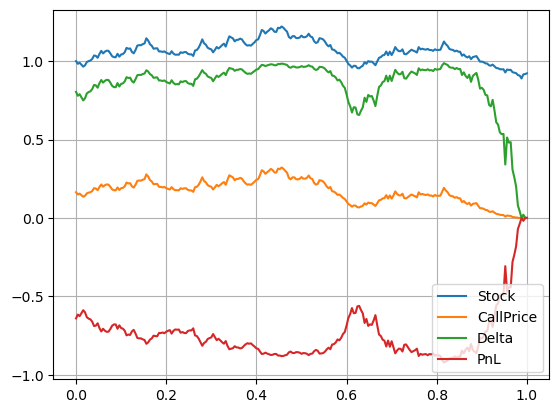

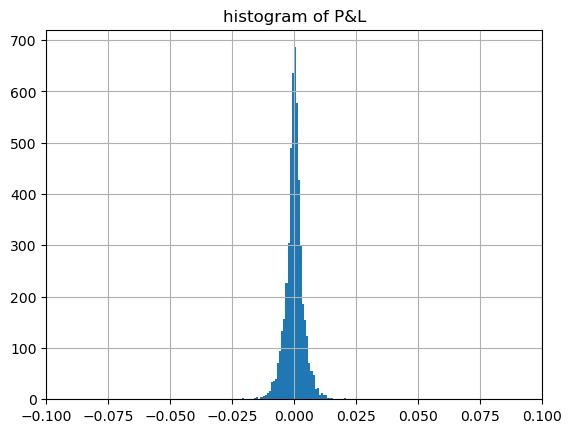

In [3]:
#%%

# This class defines puts and calls
class OptionType(enum.Enum):
    CALL = 1.0
    PUT = -1.0

def GeneratePathsGBM(NoOfPaths,NoOfSteps,T,r,sigma,S_0):    
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    W = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])
        
    X[:,0] = np.log(S_0)
    
    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]
        X[:,i+1] = X[:,i] + (r - 0.5 * sigma * sigma) * dt + sigma * (W[:,i+1]-W[:,i])
        time[i+1] = time[i] +dt
        
    #Compute exponent of ABM
    S = np.exp(X)
    paths = {"time":time,"S":S}
    return paths

# Black-Scholes Call option price
def BS_Call_Put_Option_Price(CP,S_0,K,sigma,t,T,r):
    K = np.array(K).reshape([len(K),1])
    d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) 
    * (T-t)) / (sigma * np.sqrt(T-t))
    d2    = d1 - sigma * np.sqrt(T-t)
    if CP == OptionType.CALL:
        value = st.norm.cdf(d1) * S_0 - st.norm.cdf(d2) * K * np.exp(-r * (T-t))
    elif CP == OptionType.PUT:
        value = st.norm.cdf(-d2) * K * np.exp(-r * (T-t)) - st.norm.cdf(-d1)*S_0
    return value

def BS_Delta(CP,S_0,K,sigma,t,T,r):
    # when defining a time-grid it may happen that the last grid point 
    # is slightly after the maturity
    if t-T>10e-20 and T-t<10e-7:
        t=T
    K = np.array(K).reshape([len(K),1])
    d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) * \
             (T-t)) / (sigma * np.sqrt(T-t))
    if CP == OptionType.CALL:
        value = st.norm.cdf(d1)
    elif CP == OptionType.PUT:
       value = st.norm.cdf(d1)-1.0
    return value


def mainCalculation():
    NoOfPaths = 5000
    NoOfSteps = 250

    T         = 1.0
    r         = 0.1
    sigma     = 0.2
    s0        = 1.0
    K         = [0.95]
    CP        = OptionType.CALL
    
    np.random.seed(1)
    Paths = GeneratePathsGBM(NoOfPaths,NoOfSteps,T,r,sigma,s0)
    time  = Paths["time"]
    S     = Paths["S"]
    
    # Setting up some handy lambdas
    C = lambda t,K,S0: BS_Call_Put_Option_Price(CP,S0,K,sigma,t,T,r)
    Delta = lambda t,K,S0: BS_Delta(CP,S0,K,sigma,t,T,r)
    
    # Setting up initial portfolio
    PnL = np.zeros([NoOfPaths,NoOfSteps+1])
    delta_init= Delta(0.0,K,s0)
    PnL[:,0] = C(0.0,K,s0) - delta_init * s0
            
    CallM      = np.zeros([NoOfPaths,NoOfSteps+1])
    CallM[:,0] = C(0.0,K,s0)
    DeltaM     = np.zeros([NoOfPaths,NoOfSteps+1])
    DeltaM[:,0] = Delta(0,K,s0)
    
    for i in range(1,NoOfSteps+1):
        dt = time[i] - time[i-1]
        delta_old  = Delta(time[i-1],K,S[:,i-1])
        delta_curr = Delta(time[i],K,S[:,i])
        
        PnL[:,i]    =  PnL[:,i-1]*np.exp(r*dt) - (delta_curr-delta_old)*S[:,i] # PnL
        CallM[:,i]  = C(time[i],K,S[:,i])
        DeltaM[:,i] = delta_curr
    
    # Final transaction, payment of the option (if in the money) and selling the hedge
    PnL[:,-1] = PnL[:,-1] -np.maximum(S[:,-1]-K,0) +  DeltaM[:,-1]*S[:,-1]
    
    # We plot only one path at the time
    path_id = 13
    plt.figure(1)
    plt.plot(time,S[path_id,:])
    plt.plot(time,CallM[path_id,:])
    plt.plot(time,DeltaM[path_id,:])
    plt.plot(time,PnL[path_id,:])
    plt.legend(['Stock','CallPrice','Delta','PnL'])
    plt.grid()
    
    # Plot the histogram of PnL
    plt.figure(2)
    plt.hist(PnL[:,-1],50)
    plt.grid()
    plt.xlim([-0.1,0.1])
    plt.title('histogram of P&L')
    
    # Analysis for each path
    for i in range(0,NoOfPaths):
        print('path_id = {0:2d}, PnL(t_0)={1:0.4f}, PnL(Tm-1) ={2:0.4f},S(t_m) = {3:0.4f}, max(S(tm)-K,0)= {4:0.4f}, PnL(t_m) = {5:0.4f}'.format(i,PnL[0,0],
              PnL[i,-2],S[i,-1],np.max(S[i,-1]-K,0),PnL[i,-1]))
mainCalculation()

## Hedging in presence of Jumps

instead of Black-Scholes model we consider a jump diffusion model
$$ \frac{dS(t)}{S(t)}=(r - \xi_p\mathbb{E}[e^j-1]) dt + \sigma dW^\mathbb{Q}(t) + (e^J-1)dX_p^\mathbb{Q}(t)$$

/var/folders/zv/yh2kwtrj003cc_tbwt7gr8r40000gn/T/ipykernel_3009/3537825264.py:48: RuntimeWarning: divide by zero encountered in divide
  d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) * \
/var/folders/zv/yh2kwtrj003cc_tbwt7gr8r40000gn/T/ipykernel_3009/3537825264.py:34: RuntimeWarning: invalid value encountered in sqrt
  * (T-t)) / (sigma * np.sqrt(T-t))
/var/folders/zv/yh2kwtrj003cc_tbwt7gr8r40000gn/T/ipykernel_3009/3537825264.py:35: RuntimeWarning: invalid value encountered in sqrt
  d2    = d1 - sigma * np.sqrt(T-t)


path no 10, S0=1.0, PnL(Tm-1)=-1.0068780594518794, S(tm)=1.7462673660301564, max(S(Tm)-K,0)=[0.79626737],           PnL(Tm)=-0.056978752292382806


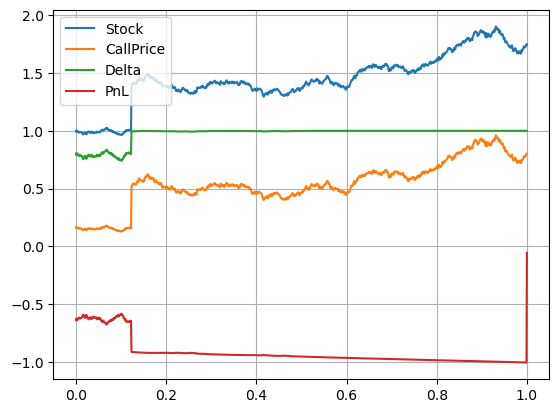

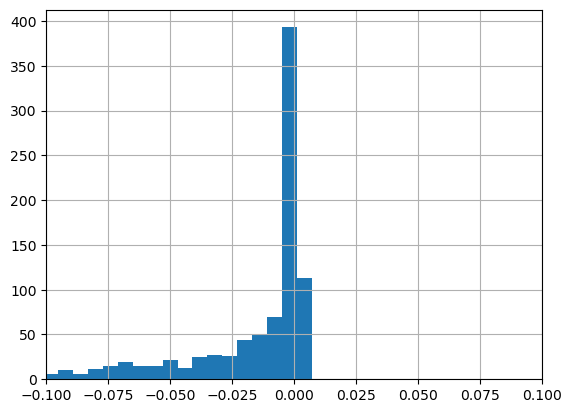

In [4]:


def GeneratePathsMerton(NoOfPaths,NoOfSteps,S0, T,xiP,muJ,sigmaJ,r,sigma):    
    # Create empty matrices for Poisson process and for compensated Poisson process
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    S = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])
                
    dt = T / float(NoOfSteps)
    X[:,0] = np.log(S0)
    S[:,0] = S0
    
    # Expectation E(e^J) for J~N(muJ,sigmaJ^2)
    EeJ = np.exp(muJ + 0.5*sigmaJ*sigmaJ)
    ZPois = np.random.poisson(xiP*dt,[NoOfPaths,NoOfSteps])
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    J = np.random.normal(muJ,sigmaJ,[NoOfPaths,NoOfSteps])
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        # making sure that samples from normal have mean 0 and variance 1
        X[:,i+1]  = X[:,i] + (r - xiP*(EeJ-1) - 0.5*sigma*sigma)*dt +sigma*np.sqrt(dt)* Z[:,i]\
                    + J[:,i] * ZPois[:,i]
        time[i+1] = time[i] +dt
        
    S = np.exp(X)
    paths = {"time":time,"X":X,"S":S}
    return paths

def mainCalculation():
    NoOfPaths = 1000
    NoOfSteps = 1000
    T         = 1.0
    r         = 0.1
    sigma     = 0.2
    xiP       = 1
    muJ       = 0.0
    sigmaJ    = 0.25
    s0        = 1.0
    K         = [0.95]
    CP        = OptionType.CALL
    
    np.random.seed(7)
    Paths = GeneratePathsMerton(NoOfPaths,NoOfSteps,s0, T,xiP,muJ,sigmaJ,r,sigma)
    time  = Paths["time"]
    S     = Paths["S"]
    
    # Setting up some handy lambdas
    C = lambda t,K,S0: BS_Call_Put_Option_Price(CP,S0,K,sigma,t,T,r)
    Delta = lambda t,K,S0: BS_Delta(CP,S0,K,sigma,t,T,r)
    
    # Setting up initial portfolio
    PnL = np.zeros([NoOfPaths,NoOfSteps+1])
    delta_init= Delta(0.0,K,s0)
    PnL[:,0] = C(0.0,K,s0) - delta_init * s0
            
    CallM      = np.zeros([NoOfPaths,NoOfSteps+1])
    CallM[:,0] = C(0.0,K,s0)
    DeltaM     = np.zeros([NoOfPaths,NoOfSteps+1])
    DeltaM[:,0] = Delta(0,K,s0)
    
    for i in range(1,NoOfSteps+1):
        dt = time[i] - time[i-1]
        delta_old  = Delta(time[i-1],K,S[:,i-1])
        delta_curr = Delta(time[i],K,S[:,i])
        
        PnL[:,i] =  PnL[:,i-1]*np.exp(r*dt) - (delta_curr-delta_old)*S[:,i] # PnL
        CallM[:,i] = C(time[i],K,S[:,i])
        DeltaM[:,i]   =Delta(time[i],K,S[:,i])
    
    # Final transaction, payment of the option (if in the money) and selling the hedge
    PnL[:,-1] = PnL[:,-1] -np.maximum(S[:,-1]-K,0) +  DeltaM[:,-1]*S[:,-1]
    
    # We plot only one path at the time
    path_id = 10
    plt.figure(1)
    plt.plot(time,S[path_id,:])
    plt.plot(time,CallM[path_id,:])
    plt.plot(time,DeltaM[path_id,:])
    plt.plot(time,PnL[path_id,:])
    plt.legend(['Stock','CallPrice','Delta','PnL'])
    plt.grid()
    
    # Plot the histogram of PnL
    plt.figure(2)
    plt.hist(PnL[:,-1],100)
    plt.grid()
    plt.xlim([-0.1,0.1])
    
    # Table result for a given path
    print("path no {0}, S0={1}, PnL(Tm-1)={2}, S(tm)={3}, max(S(Tm)-K,0)={4}, \
          PnL(Tm)={5}".format(path_id,s0,PnL[path_id,-2],S[path_id,-1], np.maximum(S[path_id,-1]-K,0.0),PnL[path_id,-1]))
    
mainCalculation()

## Vega Hedging
$$ v = \frac{\partial V}{\partial \sigma} = Ke^{-r(T-t_0)} f_{\mathcal{N}(0,1)} (d_2)\sqrt{T-t_0}$$

Under Black-Scholes the volatility parameter does not change in time, therefore we do not need to vega hedge, in reality however $\sigma$ would change
In practice to adjust the vega one needs to either buy or sell an option, or a derivative which is dependent on volatility $\sigma$
- Start with hedging the vega with another call option
- Hedge the delta with $\Delta$ underlyings

## Gamma Hedging
$$ \Gamma \coloneqq \partial{dV^2}{\partial S^2} = Ke^{-r(T-t)} \frac{ f_{\mathcal{N}(0,1)} (d_2)}{S^2\sqrt{T-t_0}}$$
- High gamma corresponds to high variation in Delta, and hence more frequent re-balancing to mantain low delta
- We cannot use the underlying to adjust the $\Gamma$
- As in Vega case we need to use other options


## Monte Carlo sensitivies: Finite difference
In the Black-Scholes model the sensitivies can be calculated analitically, in other models, closed form solutions maybe not be available in these case we need to use Monte Carlo.
With $V(\theta)$ continuos and at least twice differntiable, we have for any $\Delta \theta > 0$,
$$V (\theta + \Delta \theta) = V(\theta) + \frac{\partial V}{\partial \theta} \Delta \theta + \frac{1}{2}  \frac{\partial^2 V}{\partial^2 \theta} + ...$$
In the Monte Carlo framework, the sensitivity to $\theta$ is estimated as follows:
$$ \frac{\partial V}{\partial \theta} \approx \frac{\bar{V}(\theta + \Delta \theta)-  \bar{V}(\theta)}{\Delta \theta}$$

This approximation is of the order $\mathcal{O}(\Delta \theta)$

$$ \frac{\partial V}{\partial \theta} \approx \frac{\bar{V}(\theta + \Delta \theta)-  \bar{V}(\theta - \Delta \theta)}{ 2\Delta \theta}$$
This approximation is of the order $ \mathcal{O}({\Delta \theta^2})$
but you need more functions evaluation


## Monte Carlo Greeks: Pathwise sensitivies

$$ \frac{\partial V}{\partial \theta} =  \frac{\partial }{\partial \theta} \mathbb{E}^\mathbb{Q}\bigg[\frac{V(T,S;\theta)}{M(T)} |\mathcal{F}_{t_0}\bigg] = \mathbb{E}^\mathbb{Q}\bigg[ \frac{\partial }{\partial \theta} \frac{V(T,S;\theta)}{M(T)} |\mathcal{F}_{t_0}\bigg]$$
Assuming a constant interest rate we find:
$$ \frac{\partial V}{\partial \theta}= e^{-r{(T-t_0)}} \mathbb{E}^\mathbb{Q}\bigg[ \frac{\partial V(T,S;\theta)}{\partial S} \frac{\partial S}{\partial \theta}  |\mathcal{F}_{t_0}\bigg]$$

Applying the following methodology for an european call option under the Black-Scholes model we have:
$$V(T,S;\theta) =max(S(T) - K,0), S(T) = S(t_0)e^{(r -\frac{1}{2}\sigma^2) (T - t_0) + \sigma (W_T - W_0)}$$

The derivative of the payoff with respect $ S(t)$ is given by:

$$ \frac{\partial V}{\partial S(T)} = \mathcal{1}_{S_T>K}$$

and the necessary derivatives with respect $S(t_0)$ and $\sigma$ are as follows:
 $$ \frac{\partial{S_T}}{ \partial S_0} = e^{(r -\frac{1}{2}\sigma^2) (T - t_0) + \sigma (W_T - W_0)}$$
 $$ \frac{\partial{S_T}}{ \partial \sigma} = S(T) (-  \sigma (T - t_0) (W_T - W_0))$$

$$ \frac{\partial{V}}{ \partial S_0} = e^{-r{(T-t_0)}} \mathbb{E}^\mathbb{Q}\bigg[\mathcal{1}_{S_T>K} e^{(r -\frac{1}{2}\sigma^2) (T - t_0) + \sigma (W_T - W_0)}\bigg]$$

$$ \frac{\partial{V}}{ \partial\sigma} = e^{-r{(T-t_0)}} \mathbb{E}^\mathbb{Q}\bigg[\mathcal{1}_{S_T>K} S(T) (-  \sigma (T - t_0) (W_T - W_0))\bigg]$$
$$ \frac{\partial{V}}{ \partial\sigma} = \frac{e^{-r{(T-t_0)}}}{\sigma}\mathbb{E}^\mathbb{Q}\bigg[S(T) \bigg(log\bigg(\frac{S(T)}{S_{t_0}}\bigg) -\bigg(r -\frac{1}{2}\sigma^2\bigg)(T - t_0)\bigg)\mathcal{1}_{S_T>K}\bigg]$$

Running simulation with 5.0 paths
Running simulation with 15.0 paths
Running simulation with 25.0 paths
Running simulation with 35.0 paths
Running simulation with 45.0 paths
Running simulation with 55.0 paths
Running simulation with 65.0 paths
Running simulation with 75.0 paths
Running simulation with 85.0 paths
Running simulation with 95.0 paths
Running simulation with 106.0 paths
Running simulation with 116.0 paths
Running simulation with 126.0 paths
Running simulation with 136.0 paths
Running simulation with 146.0 paths
Running simulation with 156.0 paths
Running simulation with 166.0 paths
Running simulation with 176.0 paths
Running simulation with 186.0 paths
Running simulation with 196.0 paths
Running simulation with 206.0 paths
Running simulation with 216.0 paths
Running simulation with 226.0 paths
Running simulation with 236.0 paths
Running simulation with 246.0 paths
Running simulation with 256.0 paths
Running simulation with 266.0 paths
Running simulation with 276.0 paths
Run

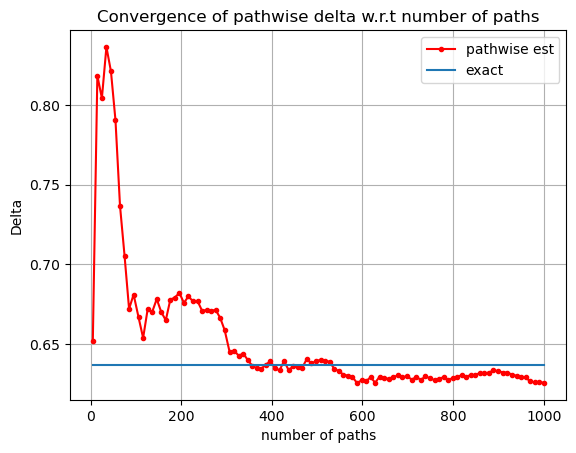

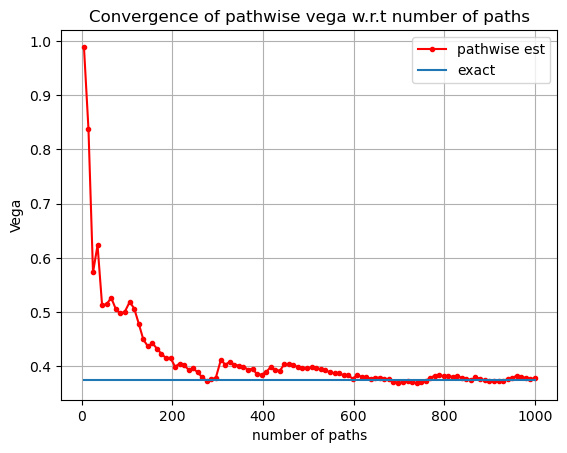

In [5]:
#%%
"""
Created on 08 Mar 2019
Pathwise estimation for delta and vega for the Black-Scholes model
@author: Lech A. Grzelak
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import enum 

# Black-Scholes Call option price
def BS_Call_Put_Option_Price(CP,S_0,K,sigma,t,T,r):
    K = np.array(K).reshape([len(K),1])
    d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) 
    * (T-t)) / (sigma * np.sqrt(T-t))
    d2    = d1 - sigma * np.sqrt(T-t)
    if CP == OptionType.CALL:
        value = st.norm.cdf(d1) * S_0 - st.norm.cdf(d2) * K * np.exp(-r * (T-t))
    elif CP == OptionType.PUT:
        value = st.norm.cdf(-d2) * K * np.exp(-r * (T-t)) - st.norm.cdf(-d1)*S_0
    return value

def BS_Delta(CP,S_0,K,sigma,t,T,r):
    K = np.array(K).reshape([len(K),1])
    d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) * \
             (T-t)) / (sigma * np.sqrt(T-t))
    if CP == OptionType.CALL:
        value = st.norm.cdf(d1)
    elif CP == OptionType.PUT:
       value = st.norm.cdf(d1)-1
    return value

def BS_Gamma(S_0,K,sigma,t,T,r):
    K = np.array(K).reshape([len(K),1])
    d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) * \
             (T-t)) / (sigma * np.sqrt(T-t))
    return st.norm.pdf(d1) / (S_0 * sigma * np.sqrt(T-t))

def BS_Vega(S_0,K,sigma,t,T,r):
    d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) * \
             (T-t)) / (sigma * np.sqrt(T-t))
    return S_0*st.norm.pdf(d1)*np.sqrt(T-t)


def EUOptionPriceFromMCPathsGeneralized(CP,S,K,T,r):
    # S is a vector of Monte Carlo samples at T
    result = np.zeros([len(K),1])
    if CP == OptionType.CALL:
        for (idx,k) in enumerate(K):
            result[idx] = np.exp(-r*T)*np.mean(np.maximum(S-k,0.0))
    elif CP == OptionType.PUT:
        for (idx,k) in enumerate(K):
            result[idx] = np.exp(-r*T)*np.mean(np.maximum(k-S,0.0))
    return result

def PathwiseDelta(S0,S,K,r,T):
    temp1 = S[:,-1]>K
    return np.exp(-r*T)*np.mean(S[:,-1]/S0*temp1)

def PathwiseVega(S0,S,sigma,K,r,T):
    temp1 = S[:,-1]>K
    temp2 = 1.0/sigma* S[:,-1]*(np.log(S[:,-1]/S0)-(r+0.5*sigma**2.0)*T)
    return np.exp(-r*T)*np.mean(temp1*temp2)


def mainCalculation():
    CP        = OptionType.CALL
    S0        = 1
    r         = 0.06
    sigma     = 0.3
    T         = 1
    K         = np.array([S0])
    t         = 0.0

    NoOfSteps = 1000
    delta_Exact = BS_Delta(CP,S0,K,sigma,t,T,r)
    vega_Exact  = BS_Vega(S0,K,sigma,t,T,r)
    
    NoOfPathsV = np.round(np.linspace(5,NoOfSteps,100))
    deltaPathWiseV = np.zeros(len(NoOfPathsV))
    vegaPathWiseV  = np.zeros(len(NoOfPathsV))
    
    for (idx,nPaths) in enumerate(NoOfPathsV):
        print('Running simulation with {0} paths'.format(nPaths))
        np.random.seed(3)
        paths1 = GeneratePathsGBM(int(nPaths),NoOfSteps,T,r,sigma,S0)
        S = paths1["S"]
        delta_pathwise = PathwiseDelta(S0,S,K,r,T)
        deltaPathWiseV[idx]= delta_pathwise
        
        vega_pathwise = PathwiseVega(S0,S,sigma,K,r,T)
        vegaPathWiseV[idx] =vega_pathwise
        
    plt.figure(1)
    plt.grid()
    plt.plot(NoOfPathsV,deltaPathWiseV,'.-r')
    plt.plot(NoOfPathsV,delta_Exact*np.ones([len(NoOfPathsV),1]))
    plt.xlabel('number of paths')
    plt.ylabel('Delta')
    plt.title('Convergence of pathwise delta w.r.t number of paths')
    plt.legend(['pathwise est','exact'])
    
    plt.figure(2)
    plt.grid()
    plt.plot(NoOfPathsV,vegaPathWiseV,'.-r')
    plt.plot(NoOfPathsV,vega_Exact*np.ones([len(NoOfPathsV),1]))
    plt.xlabel('number of paths')
    plt.ylabel('Vega')
    plt.title('Convergence of pathwise vega w.r.t number of paths')
    plt.legend(['pathwise est','exact'])
    
mainCalculation()

## Heston model's delta, pathwise sensitivity
- The pathwise sensitivity for the Heston's delta parameter is given by:
$$ \frac{\partial V}{\partial S(t_0)} = e^{-r(T- t_0)}\mathbb{E}^\mathbb{Q}\bigg[\frac{\partial V(T,S;S(t_0))}{\partial S(T)} \frac{\partial S(T)}{S(t_0)}|\mathcal{F}(t_0)\bigg]

The derivative of the payoff function with respect to S(T) reads:
$$ \frac{\partial V(T,S;\theta)}{\partial S(T)} = \mathcal{1}_{S(T)>K} $$

The solution for the Heston process is:
$$ S(T) = S(t_0) exp\bigg[\int_{t_0}^{T}\bigg(r - \frac{1}{2}v(t)\bigg)dt + \int_{t_0}^{T} \sqrt{v(t)}dW_x(t)\bigg ]n $$
so that the sensitivity to $S(t_0)$ is given by:
$$\frac{\partial S(T)}{\partial S(t_0)} = \frac{S(T)}{S(t_0)} $$

As in the Black-Scholes model, the option delta is given by the following expression:
$$ \frac{\partial V}{\partial S(t_0)} = e^{-r(T - t_0)}\mathbb{E}^{\mathbb{Q}}\bigg[\frac{S(T)}{S(t_0)} \mathbb{1}_{S(T)>K}| \mathcal{F}_{t_0}\bigg]

The concept of Vega is different, the sensitivity of volatility is the sensitivity of all model parameters

## Likelihood Ratio Method
the basis of the method is formed by a differentiation of the probability density function:
$$ V(\theta) \coloneqq V(t_0,S;\theta) = e^{-r(T - t_0)} \int_\mathbb{R} V(T,z)f_{S(t)}(z;\theta)dz$$
in order to compute the sensitivity with respect to the parameter $\theta$, the integration and the differentition operators are interchanged:
$$ \frac{\partial V}{\partial \theta} =  e^{-r(T - t_0)} \frac{\partial}{\partial \theta}\int_\mathbb{R} V(T,z)f_{S(t)}(z;\theta)dz$$
$$ \frac{\partial V}{\partial \theta} =  e^{-r(T - t_0)} \int_\mathbb{R} V(T,z)\frac{\partial}{\partial \theta} f_{S(t)}(z;\theta)dz$$

multiplaying and dividing by the same factor $ f_{S(t)}(z;\theta)$ we obtain :
$$ \frac{\partial V}{\partial \theta} =  e^{-r(T - t_0)} \int_\mathbb{R} V(T,z)\frac{\frac{\partial}{\partial \theta} f_{S(t)}(z;\theta)}{ f_{S(t)}(z;\theta)}dz$$
$$ \frac{\partial V}{\partial \theta} =  e^{-r(T - t_0)} \mathbb{E}^{\mathbb{Q}}\bigg[V(T,z)\frac{\frac{\partial}{\partial \theta} f_{S(t)}(z;\theta)}{ f_{S(t)}(z;\theta)}| \mathcal{F}_{t_0} \bigg]$$


the ratio can be expressed as a logarithm as follows:
$$ \frac{\partial V}{\partial \theta} =  e^{-r(T - t_0)} \mathbb{E}^{\mathbb{Q}}\bigg[V(T,z) \frac{\partial}{\partial \theta} log f_{S(T)}(z;\theta)| \mathcal{F}_{t_0} \bigg]$$


recalling the log-normal PDF under the Black and Scholes model

$$ f_{S(T)}(x) = \frac{1}{\sigma_x \sqrt{2\pi (T -t_0)}}exp\bigg[ - \frac{ log\frac{x}{S(t_0)} - (r - \frac{1}{2}\sigma^2) (T- t_0)}{2\sigma^2(T-t_0)}^2\bigg] $$
the first derivatives with respect to $S_{t_0}$ and $\sigma$ are found to be:
$$ \frac{\partial log f_{S(T)}(x)}{\partial S(t_0)} = \frac{\beta(x)}{S(t_0) \sigma^2(T-t_0)}, \beta(x) = log\bigg(\frac{x}{S(t_0)}\bigg) - (r - \frac{1}{2}\sigma^2) (T - t_0)$$
$$ \frac{\partial log f_{S(T)}(x)}{\partial\sigma} = - \frac{1}{\sigma} + \frac{1}{\sigma^3 (T - t_0)}, \beta^2(x) - \frac{1}{\sigma} \beta(x)$$
$$ \frac{\partial V}{\partial S(t_0)} = \frac{e^{-r(T-t_0)}}{S(t_0) \sigma^2(T-t_0)} \mathbb{E}^{\mathbb{Q}}[max(S(T)) - K,0) \beta(S(T)]$$
$$ \frac{\partial V}{\partial \sigma} = e^{-r(T-t_0)} \mathbb{E}^{\mathbb{Q}}[max(S(T)) - K,0) ( - \frac{1}{\sigma} + \frac{1}{\sigma^3(T - t_0)}\beta^2(S(T)) - \frac{1}{\sigma}\beta(S(T))$$


(0, 5.0)
Running simulation with 5.0 paths
(1, 15.0)
Running simulation with 15.0 paths
(2, 25.0)
Running simulation with 25.0 paths
(3, 35.0)
Running simulation with 35.0 paths
(4, 45.0)
Running simulation with 45.0 paths
(5, 55.0)
Running simulation with 55.0 paths
(6, 65.0)
Running simulation with 65.0 paths
(7, 75.0)
Running simulation with 75.0 paths
(8, 85.0)
Running simulation with 85.0 paths
(9, 95.0)
Running simulation with 95.0 paths
(10, 106.0)
Running simulation with 106.0 paths
(11, 116.0)
Running simulation with 116.0 paths
(12, 126.0)
Running simulation with 126.0 paths
(13, 136.0)
Running simulation with 136.0 paths
(14, 146.0)
Running simulation with 146.0 paths
(15, 156.0)
Running simulation with 156.0 paths
(16, 166.0)
Running simulation with 166.0 paths
(17, 176.0)
Running simulation with 176.0 paths
(18, 186.0)
Running simulation with 186.0 paths
(19, 196.0)
Running simulation with 196.0 paths
(20, 206.0)
Running simulation with 206.0 paths
(21, 216.0)
Running simu

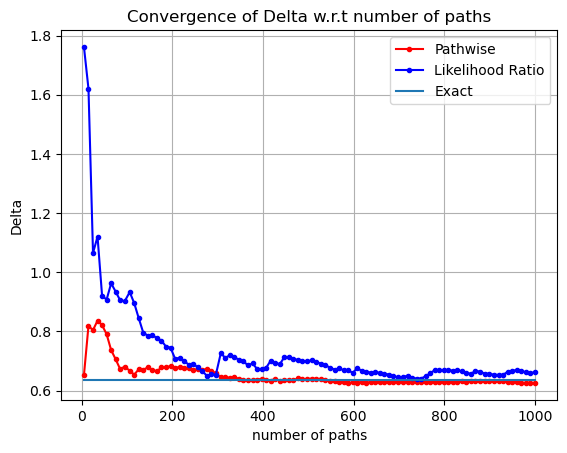

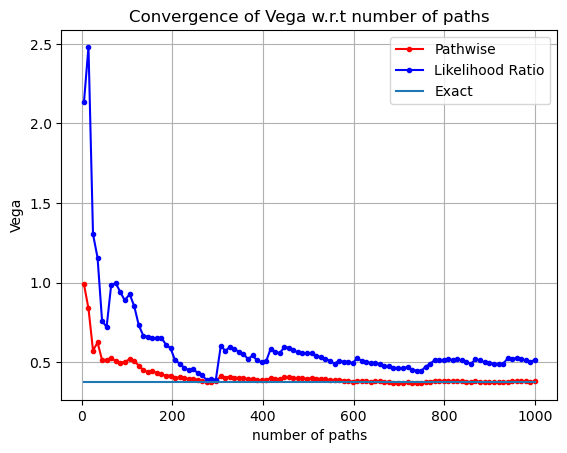

In [7]:
def LikelihoodRatioDelta(S0, S, sigma, K, r, T):
    temp1 = np.maximum(S[:, -1] - K, 0)
    beta = np.log(S[:, -1] / S0) - (r - 0.5 * sigma ** 2) * T
    return np.exp(-r * T) * np.mean(temp1 * beta / (S0 * sigma ** 2 * T))

def LikelihoodRatioVega(S0, S, sigma, K, r, T):
    temp1 = np.maximum(S[:, -1] - K, 0)
    beta = np.log(S[:, -1] / S0) - (r - 0.5 * sigma ** 2) * T
    term1 = -1.0 / sigma
    term2 = beta ** 2 / (sigma ** 3 * T) - beta / sigma
    return np.exp(-r * T) * np.mean(temp1 * (term1 + term2))

def mainCalculation():
    CP = OptionType.CALL
    S0 = 1
    r = 0.06
    sigma = 0.3
    T = 1
    K = np.array([S0])
    t = 0.0

    NoOfSteps = 1000
    delta_Exact = BS_Delta(CP, S0, K, sigma, t, T, r)
    vega_Exact = BS_Vega(S0, K, sigma, t, T, r)

    NoOfPathsV = np.round(np.linspace(5, NoOfSteps, 100))
    deltaPathWiseV = np.zeros(len(NoOfPathsV))
    vegaPathWiseV = np.zeros(len(NoOfPathsV))
    deltaLikelihoodRatioV = np.zeros(len(NoOfPathsV))
    vegaLikelihoodRatioV = np.zeros(len(NoOfPathsV))

    for (idx, nPaths) in enumerate(NoOfPathsV):
        print('Running simulation with {0} paths'.format(nPaths))
        np.random.seed(3)
        paths1 = GeneratePathsGBM(int(nPaths), NoOfSteps, T, r, sigma, S0)
        S = paths1["S"]
        
        delta_pathwise = PathwiseDelta(S0, S, K, r, T)
        deltaPathWiseV[idx] = delta_pathwise
        
        vega_pathwise = PathwiseVega(S0, S, sigma, K, r, T)
        vegaPathWiseV[idx] = vega_pathwise
        
        delta_likelihood_ratio = LikelihoodRatioDelta(S0, S, sigma, K, r, T)
        deltaLikelihoodRatioV[idx] = delta_likelihood_ratio
        
        vega_likelihood_ratio = LikelihoodRatioVega(S0, S, sigma, K, r, T)
        vegaLikelihoodRatioV[idx] = vega_likelihood_ratio

    plt.figure(1)
    plt.grid()
    plt.plot(NoOfPathsV, deltaPathWiseV, '.-r', label='Pathwise')
    plt.plot(NoOfPathsV, deltaLikelihoodRatioV, '.-b', label='Likelihood Ratio')
    plt.plot(NoOfPathsV, delta_Exact * np.ones([len(NoOfPathsV), 1]), label='Exact')
    plt.xlabel('number of paths')
    plt.ylabel('Delta')
    plt.title('Convergence of Delta w.r.t number of paths')
    plt.legend()

    plt.figure(2)
    plt.grid()
    plt.plot(NoOfPathsV, vegaPathWiseV, '.-r', label='Pathwise')
    plt.plot(NoOfPathsV, vegaLikelihoodRatioV, '.-b', label='Likelihood Ratio')
    plt.plot(NoOfPathsV, vega_Exact * np.ones([len(NoOfPathsV), 1]), label='Exact')
    plt.xlabel('number of paths')
    plt.ylabel('Vega')
    plt.title('Convergence of Vega w.r.t number of paths')
    plt.legend()

    plt.show()

mainCalculation()


The Pathwise methodology seems more precise.